In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab06A.ipynb")

---

<h3><center>E7 -  Introduction to Programming for Scientists and Engineers</center></h3>

<h2><center>Lab session #06-A <br></center></h2>

<h1><center>Matplotlib<br></center></h1>

---

In this lab we will practice using Matplotlib to create two-dimensional plots, including scatter plots, line plots, histograms, and bar plots. In each case you will be given a detailed specification for the plot, as well as a picture of what your plot should look like. The autograder will check that the specification has been met. 

In [2]:
from resources.hashutils import *
import numpy as np
import matplotlib.pyplot as plt

# Question 1: Scatter plot

We begin by loading data from a CSV file and visualizing it as a scatter plot. The data is a fictitious set of measurements of the water level in a tank through time. 

## Question 1.1: Import the data

The data is contained in the file `2Ddata.csv`. Use [`np.loadtxt`](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html) to read this data into a NumPy array called `data`. 
The first column of the data set is time in hours, and will be plotted along the horizontal (x) axis. The second column is the water level in meters, and will be plotted along the vertical (y) axis.

In [3]:
data = np.loadtxt('2Ddata.csv', delimiter = ',')

In [4]:
grader.check("q1p1")

q1p1 results: All test cases passed!

## Question 1.2: Plot

Next, create a scatter plot of the data with the following characteristics.

+ Set the figure size to `(10,5)`.
+ Use the [`ax.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html) function to plot the data. 
+ Set the marker color to `'dodgerblue'`.
+ The the y-axis limits to `(-2,2)`.
+ Set the ticks for the y axis to `[-2,-1,0,1,2]`.
+ Set the font size for both the x and y tick labels to 14. 
+ Add a grid with dashed lines (`'--'`)
+ Set the x axis label to `'time [minutes]'`.
+ Set the y axis label to `'height [m]'`.
+ Both labels should have font size equal to 18.
+ Set the visibility of the top and right spines to `False`.
+ Set the title to `'Measured water level'` with a font size of 20.

**Desired result:**

<img src="resources/scatter.png" width="600" />

/tmp/ipykernel_113/2361573611.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(),fontsize =14)


Text(0.5, 1.0, 'Measured water level')

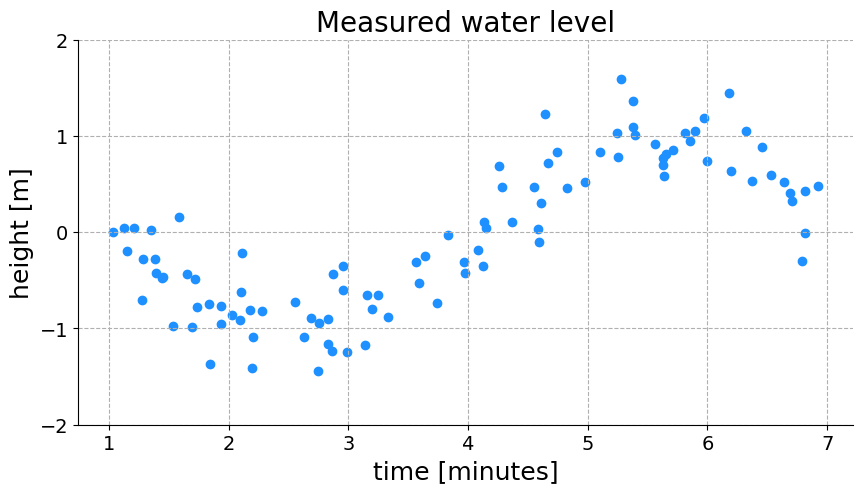

In [5]:
fig1, ax1 = plt.subplots(figsize = (10,5))
ax1.scatter (data[:,0],data[:,1],
            c = 'dodgerblue')

ax1.set_ylim(-2,2)
ax1.set_yticks([-2,-1,0,1,2])

ax1.set_xticklabels(ax1.get_xticklabels(),fontsize =14)
ax1.set_yticklabels(ax1.get_yticklabels(),fontsize =14)

ax1.set_xlabel('time [minutes]', fontsize =18)
ax1.set_ylabel('height [m]', fontsize =18)

ax1.grid(linestyle = '--')
ax1.spines[['top','right']].set_visible(False)
ax1.set_title('Measured water level', fontsize = 20)

In [6]:
grader.check("q1p2")

q1p2 results: All test cases passed!

# Question 2: Line plot

Next we will add two smooth polynomial approximations to the data from the previous question. One will be a linear function, the other a cubic function. The formulas for each of these are:

\begin{align*}
&y1 = -1.6 + 0.4\:x & \text{... linear approximation} \\
&y3 = 3.65 -4.78\: x + 1.46\: x^2 -0.12\: x^3  & \text{... cubic approximation}
\end{align*}



## Question 2.1: Compute the two approximations

First we must compute the values of y1 and y3 on an array of points along the x axis. This array should have 20 equally spaced points, and it should span from x=1 to x=7. Call the array `xx`. Then evaluate the linear and cubic functions on `xx` and call the resulting arrays `y1` and `y3` respectively. Each of these should have the same shape as `xx`.

**Hint**: [`np.linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)

In [7]:
xx = np.linspace(1,7,20)
y1 = -1.6+0.4*xx
y3 = 3.65 - (4.78*xx)+(1.46*(xx**2))-(0.12*(xx**3))

In [8]:
grader.check("q2p1")

q2p1 results: All test cases passed!

## Question 2.2: Plot

Now we can build the plot by overlaying the two lines on the scatter plot. Here is the specification:

+ All of the specifications for the scatter plot in Question 1 apply here. 

+ Label the scatter plotted data as 'data' in the legend

+ Use the [ax.plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html) function to plot the two lines.
+ The linear approximation should have these characteristics:
    + a line width of 2
    + dashed  line style(`'--'`)
    + star marker (`'*'`) of size 10
    + `magenta` in color
    + labels as 'linear' in the legend

+ The cubic approximation should have these characteristics:
    + a line width of 2
    + dash-dotted line style(`'-.'`)
    + round marker (`'o'`) of size 10, with a black edge
    + `orangered` in color
    + labels as 'cubic' in the legend

**Desired result:**

<img src="resources/scatter_and_line.png" width="800" />

/tmp/ipykernel_113/756283121.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(),fontsize =14)


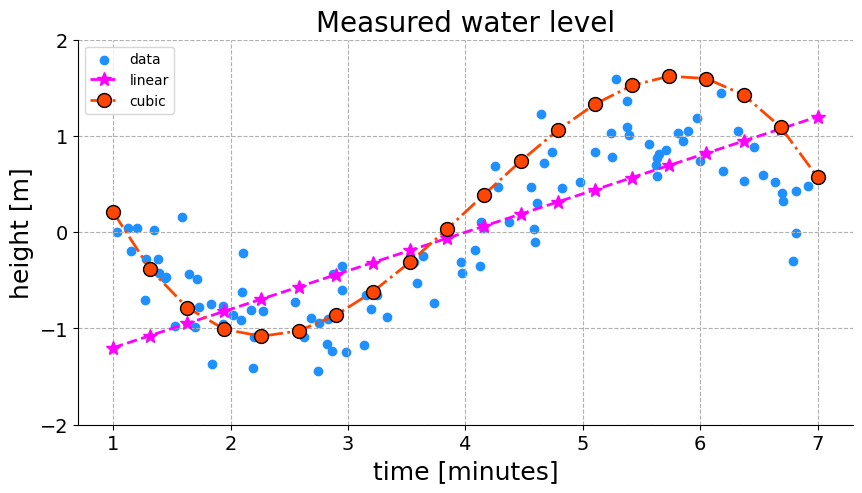

In [9]:
fig2, ax2 = plt.subplots(figsize =(10,5))
ax2.scatter (data[:,0],data[:,1],
            c = 'dodgerblue', label = 'data')

ax2.set_ylim(-2,2)
ax2.set_yticks([-2,-1,0,1,2])

ax2.set_xticklabels(ax2.get_xticklabels(),fontsize =14)
ax2.set_yticklabels(ax2.get_yticklabels(),fontsize =14)

ax2.set_xlabel('time [minutes]', fontsize =18)
ax2.set_ylabel('height [m]', fontsize =18)

ax2.grid(linestyle = '--')
ax2.spines[['top','right']].set_visible(False)
ax2.set_title('Measured water level', fontsize = 20)
ax2.plot(xx, y1 , 
        color='magenta',linewidth=2, linestyle = '--', marker='*', markersize=10, label = 'linear')
ax2.plot(xx, y3 , 
        color='orangered',linewidth=2, linestyle = '-.', marker='o', markersize=10, 
        markeredgecolor='black', label = 'cubic')

ax2.legend()

In [10]:
grader.check("q2p2")

q2p2 results: All test cases passed!

# Question 3: Histogram

The data in this problem consists of the 200 scores by two teams in a popular online game. The scores are integers ranging from 0 to 100. They are stored in two `.npy` files called `team1.npy` and `team2.npy`. Your task is to present the scores as two histograms -- one for Team 1 and another for Team 2. 

## Question 3.1: Import the data.

Import the files `'team1.npy'` and `'team2.npy'` to NumPy arrary called `team1` and `team2` respectively.

**Hint**: For binary NumPy files we use [`np.load`](https://numpy.org/doc/stable/reference/generated/numpy.load.html)

In [11]:
team1 = np.load('team1.npy')
team2 = np.load('team2.npy')

In [12]:
grader.check("q3p1")

q3p1 results: All test cases passed!

## Question 3.2: Plot

The two histograms should be placed in a figure in two rows, with Team 1 on the top row and Team 2 on the bottom row. Here are the specifications for the figure. 

+ Set the figure size to `(6,8)` and the number of rows to 2.
+ Use [`ax.hist`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html) for both plots.
+ Top row: Team 1
    + The histogram should have 15 bins, the bar widths should be 80% of the bin size, and the bar color should be 'darkgreen'.
    + Remove the left, top, and right side spines.
    + The x-axis label should be 'Team 1' and have a font size of 16.
+ Bottom row: Team 2
    + The histogram should have 10 bins, the bar widths should be 60% of the bin size, and the bar color should be 'darkred'.
    + Remove the left, top, and right side spines.
    + The x-axis label should be 'Team 2' and have a font size of 16.

**Desired result:**

<img src="resources/histogram.png" width="400" />

Text(0.5, 0, 'Team 2')

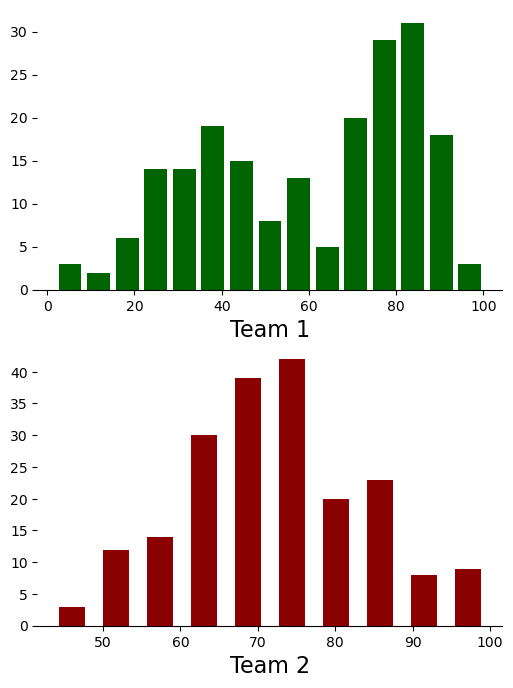

In [13]:
fig3, ax3 = plt.subplots(figsize=(6,8), nrows=2)

ax3[0].hist(team1, bins=15, range=None, rwidth=0.8, histtype='bar', color='darkgreen')
ax3[0].spines[['top','left','right']].set_visible(False)
ax3[0].set_xlabel('Team 1', fontsize=16)

ax3[1].hist(team2, bins=10, range=None, rwidth=0.6, histtype='bar', color='darkred')
ax3[1].spines[['top','left','right']].set_visible(False)
ax3[1].set_xlabel('Team 2', fontsize=16)

In [14]:
grader.check("q3p2")

q3p2 results: All test cases passed!

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [15]:
grader.check_all()

q1p1 results: All test cases passed!

q1p2 results: All test cases passed!

q2p1 results: All test cases passed!

q2p2 results: All test cases passed!

q3p1 results: All test cases passed!

q3p2 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Make sure you submit the .zip file to Gradescope.

In [16]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)